In [1]:
from NIX_Testing import HDRL
from NIX_Testing import HDRL2
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#HDRL.init()


/home/ydallilar/.miniconda2/envs/py3/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


In [2]:
darks = np.zeros([2048, 2048, 8])
brights = np.zeros([2048, 2048, 8])
ims = np.zeros([2048, 2048, 8])
f_name = "/home/ydallilar/Documents/NIX/nixDetBackup/PER-124/PER-124-04-1/ERIS_NIX_TEC_LABGAINLINEARITY239_%04d.fits"


In [3]:
for i in range(8):                                                                                                   
    ims[:,:,i] = fits.open(f_name % (56+i*2))[0].data - fits.open(f_name % (16+i*2))[0].data


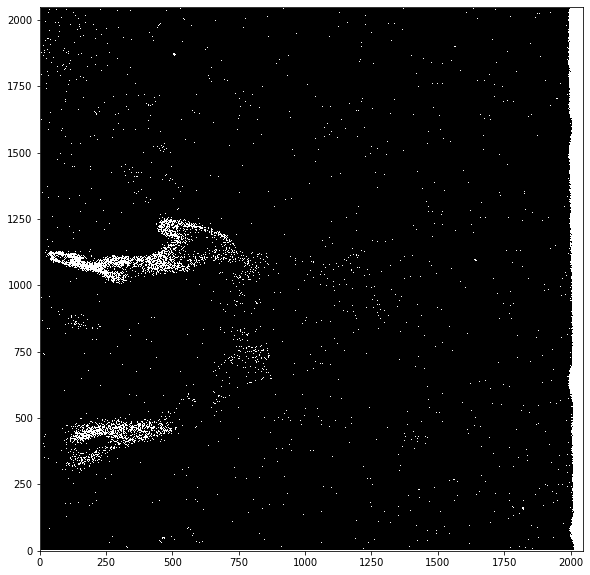

In [4]:
#bpm2d = HDRL.bpm_2d_compute(ims[:,:,0], method='filter', kappa_low=5., kappa_high=10., maxiter=10,
#                           smooth_x=5, smooth_y=5)
bpm2d = HDRL2.bpm_2d_compute(ims[:,:,3], method='legendre', kappa_low=5., kappa_high=10., maxiter=10,
                           steps_x=10, steps_y=10, filter_size_x=10, filter_size_y=10, order_x=2, order_y=2)
plt.figure(figsize=(10,10))
plt.imshow(bpm2d, origin='lower', cmap='gray')

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


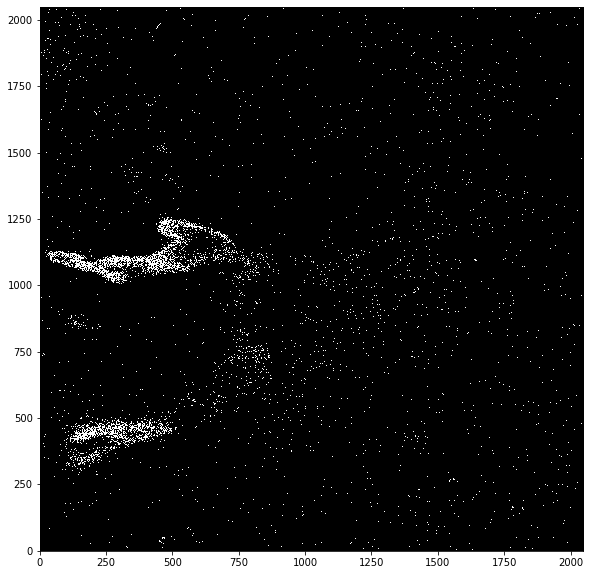

In [5]:
bpm2d = HDRL2.bpm_2d_compute(ims[:,:,0], method='filter')
print(bpm2d)
plt.figure(figsize=(10,10))
plt.imshow(bpm2d, origin='lower', cmap='gray')

In [6]:
HDRL.ERROR_IMAGE.value = True

In [7]:
expt = np.arange(8)*2+2

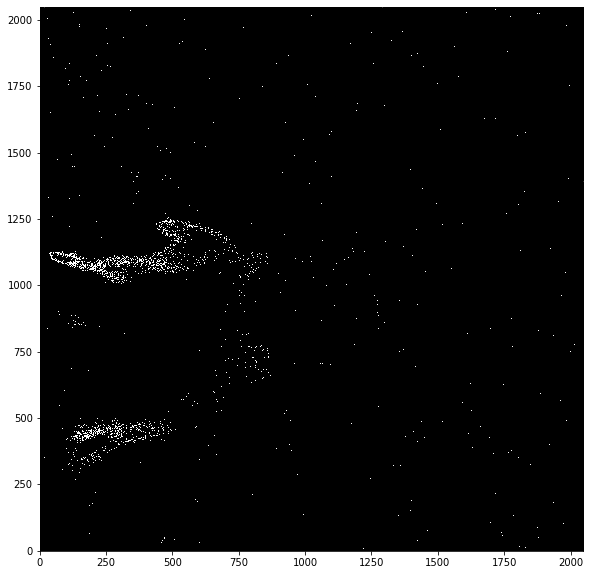

In [8]:
HDRL.ERROR_METHOD.value = 0
bpmfit = HDRL2.bpm_fit_compute(ims, expt, degree=2, pval=0.1)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

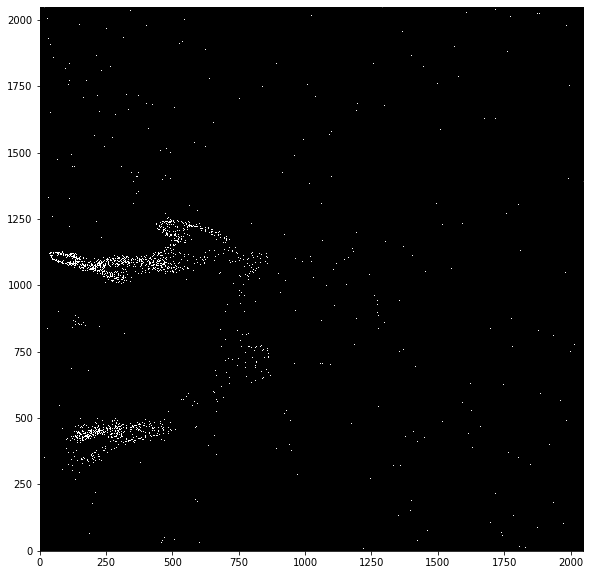

In [9]:
HDRL.ERROR_METHOD.value = 0
bpmfit = HDRL2.bpm_fit_compute(ims, expt, method='rel_chi', degree=2, rel_chi_low=5., rel_chi_high=10.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

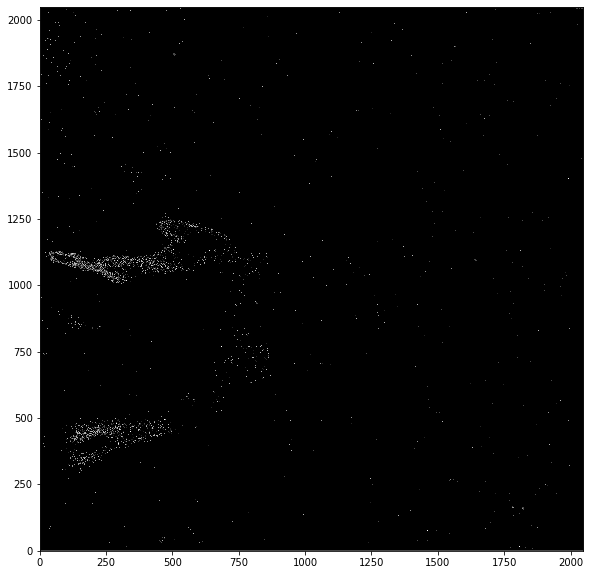

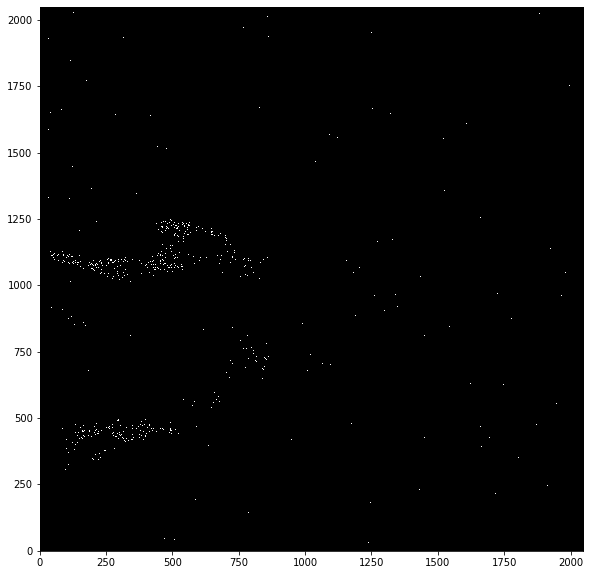

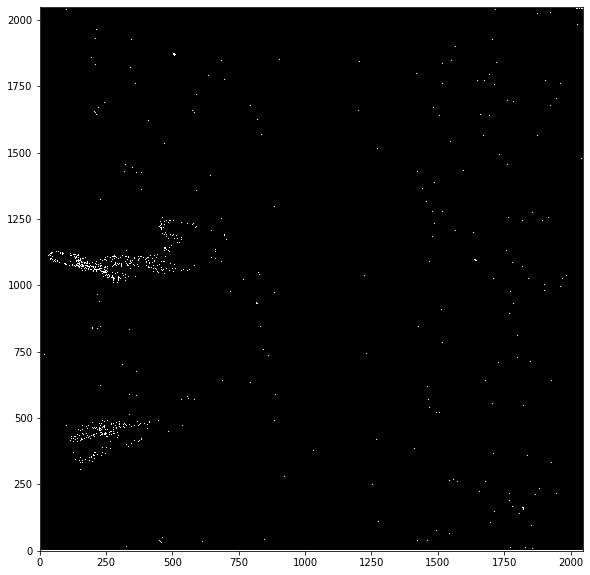

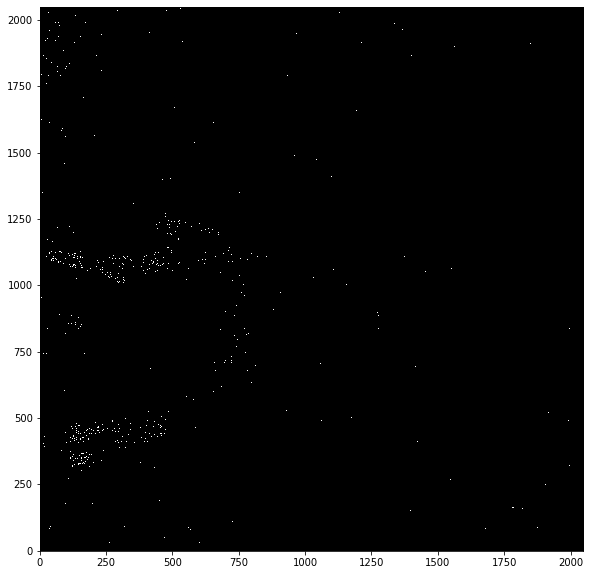

In [10]:
HDRL.ERROR_METHOD.value = 0
bpmfit = HDRL2.bpm_fit_compute(ims, expt, method='rel_coef', degree=2, rel_coef_low=5., rel_coef_high=10.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')


for i in range(3):
    tmp = np.zeros([2048, 2048])
    tmp[np.where(bpmfit == 2**i)] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(tmp, cmap='gray', origin='lower')
    

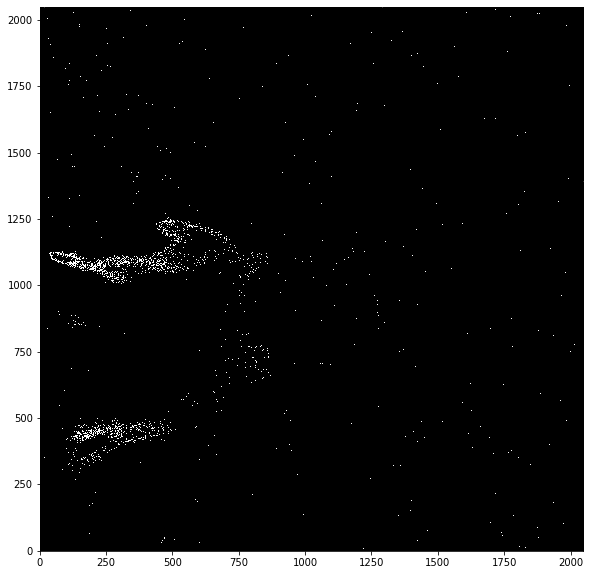

In [11]:
HDRL.ERROR_METHOD.value = 0
bpmfit = HDRL2.bpm_fit_compute(ims, expt, degree=2, pval=0.1)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

/home/ydallilar/.miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


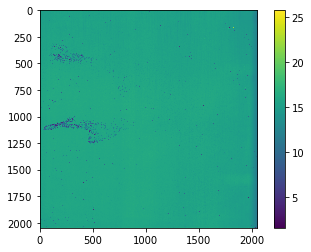

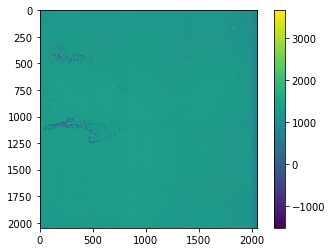

In [12]:
im = (ims[:,:,0]*HDRL.GAIN.value+(HDRL.RN_ADU.value*HDRL.GAIN.value)**2)
im = im**0.5/HDRL.GAIN.value
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.figure()
plt.imshow(ims[:,:,0])
plt.colorbar()